## Business Use Case

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

## Project Description

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

### About The Dataset

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 



You are provided with following 2 files:

1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.
 
### Dataset Attributes

Here is the description of all the variables:
1. Variable: Definition
2. ID: Unique client ID
3. age: Age of the client
4. job: Type of job
5. marital: Marital status of the client
6. education: Education level
7. default: Credit in default.
8. housing: Housing loan
9. loan: Personal loan
10. contact: Type of communication
11. month: Contact month
12. day_of_week: Day of week of contact
13. duration: Contact duration
14. campaign: number of contacts performed during this campaign to the client
15. pdays: number of days that passed by after the client was last contacted
16. previous: number of contacts performed before this campaign
17. poutcome: outcome of the previous marketing campaign

Output variable (desired target):

18. Subscribed (target): has the client subscribed a term deposit? (YES/NO)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [3]:
df_test = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')
df_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


We don't have any null values. We can also see that we have only objects and intergers as Dtype. 

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


We don't have null values and as Dtype we can see we have intgers and object. 

In [6]:
print(df_train.shape)
print(df_test.shape)

(31647, 18)
(13564, 17)


Our target variable is present only in train Dset. Hence the difference 18v17. Our target variable is 'Subscribed'.

In [7]:
# Check for nulls in train set

df_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [8]:
# Check for nulls in test set as well

df_test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

We can see once again that we are clear for nulls in both sets. 

In [9]:
df_train.columns.to_list()

['ID',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'subscribed']

I will do some analysis regarding the columns that can influence a loan as age, job, marital situation, loan, if the client have a house or not. 

### Age

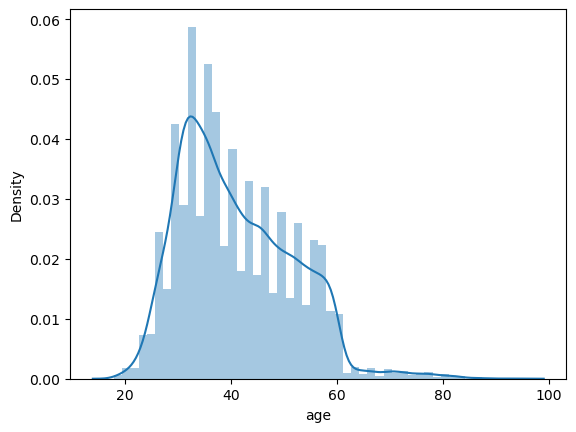

In [10]:
sns.distplot(df_train['age']);

<Axes: xlabel='age', ylabel='count'>

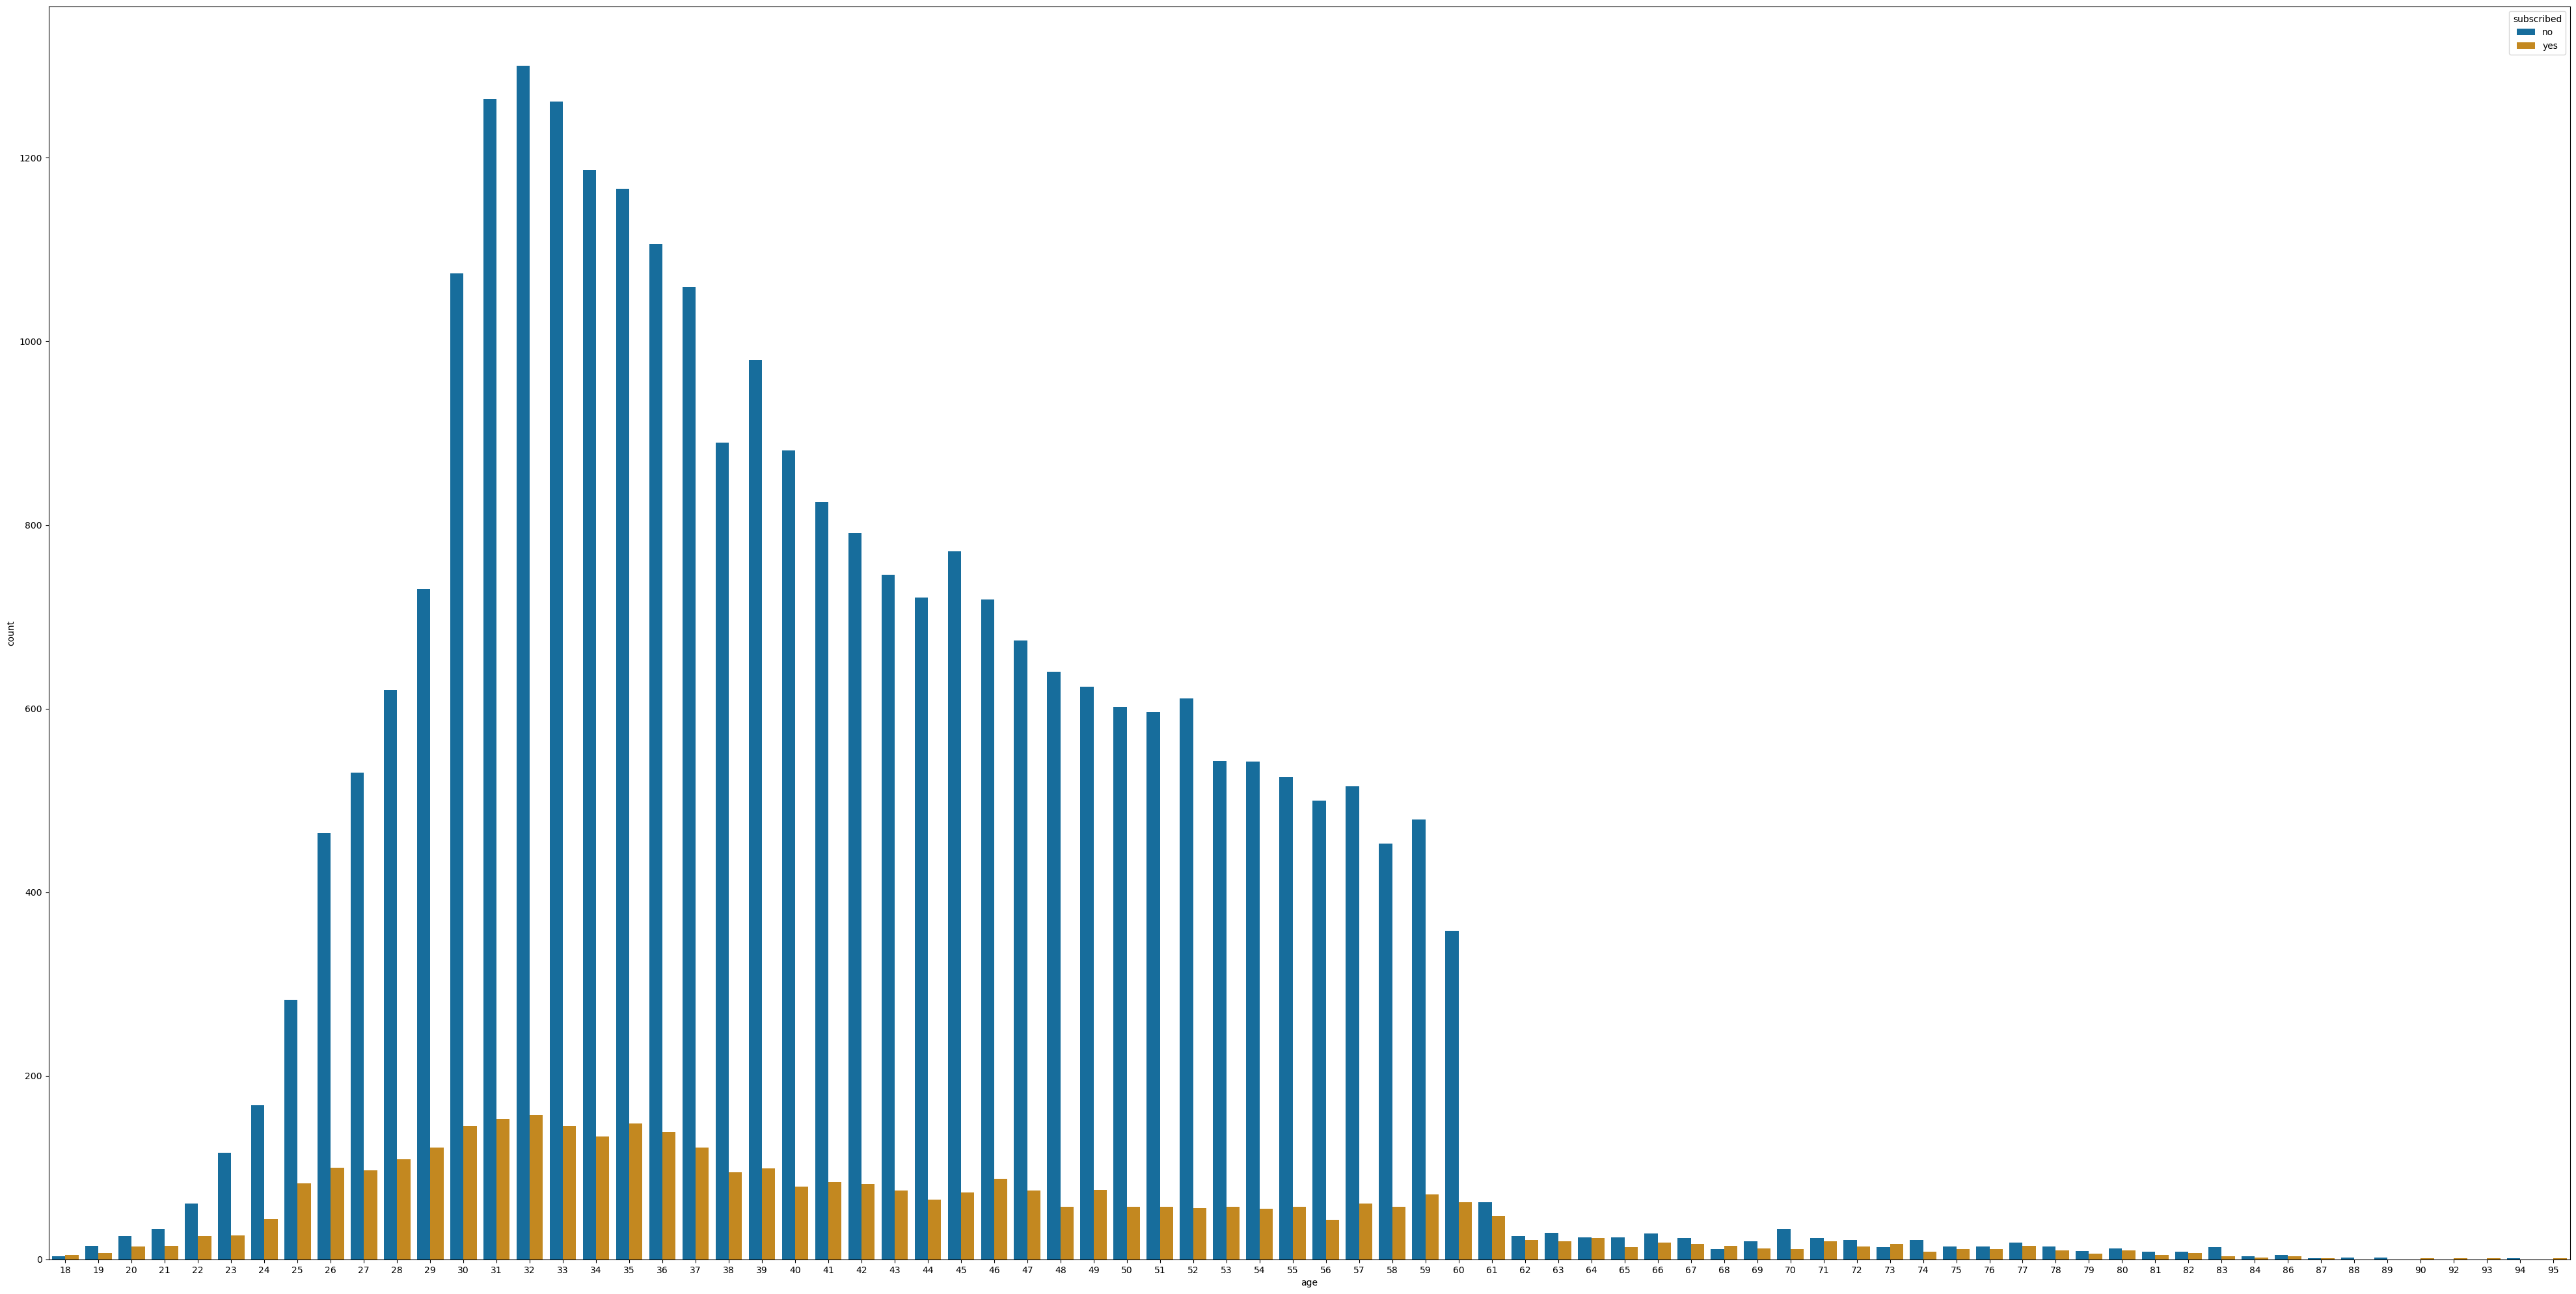

In [11]:
plt.figure(figsize = (50,25))
sns.countplot(x ='age', hue = 'subscribed', data = df_train, palette = 'colorblind')


Most of the clients are in between 20 and 60 years old and most appliances are between 30 and 40 years pld. We can also see that the curve is skewed until 95 years wich is probably an error since the banks don't give loans when the life expectance is low. 

### Job

In [12]:
# since there are less jobs types we can count them 
df_train['job'].value_counts()


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

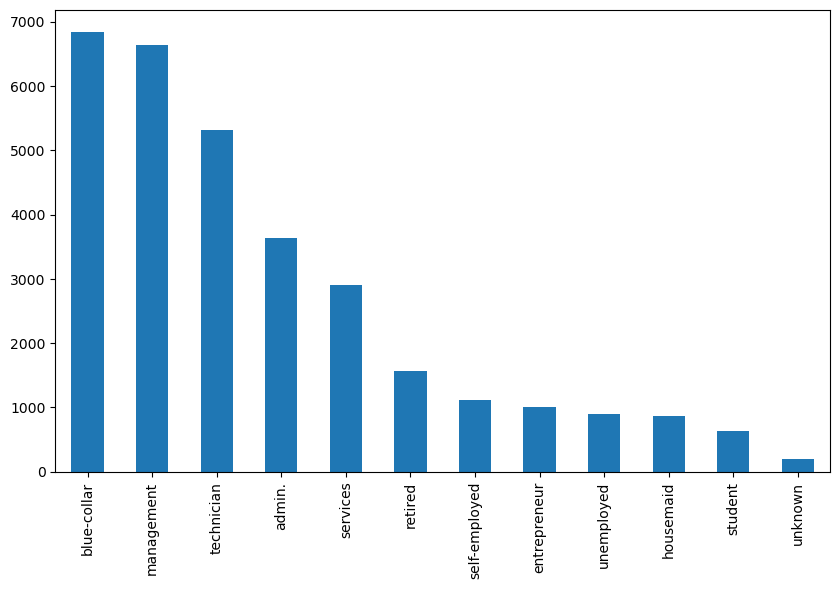

In [13]:
df_train['job'].value_counts().plot(kind='bar', figsize=(10,6));


<Axes: xlabel='job', ylabel='count'>

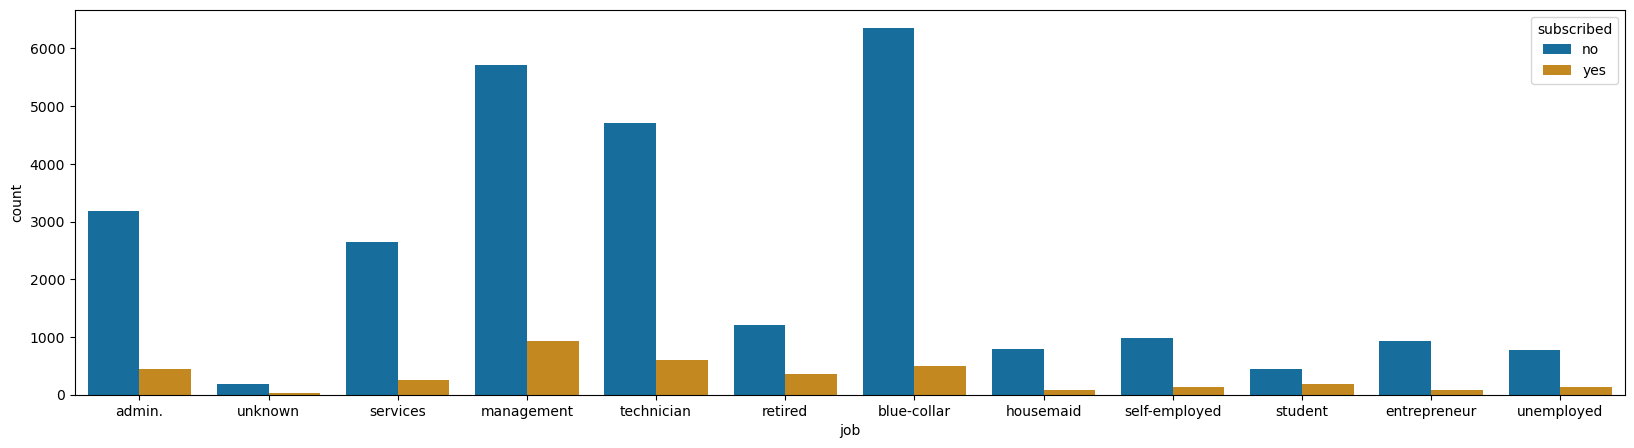

In [14]:
plt.figure(figsize = (20,5))
sns.countplot(x ='job', hue = 'subscribed', data = df_train, palette = 'colorblind')


We can see that the least columns are students, house maid and unemployed wich make sens since those people are the least that can pay a loan. 

### Marital 

In [15]:
df_train['marital'].value_counts()


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

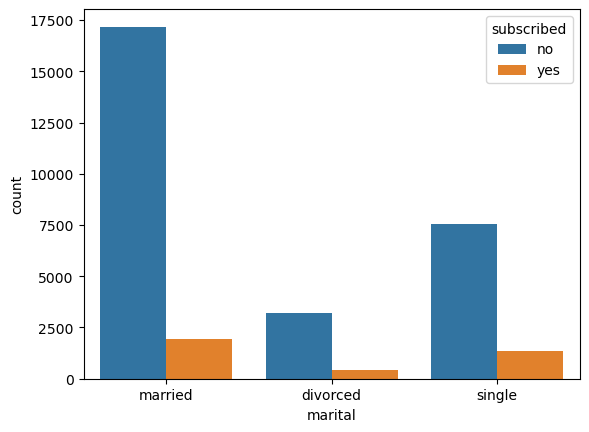

In [16]:
sns.countplot(data=df_train, x='marital', hue = 'subscribed');


### Education 

In [17]:
df_train['education'].value_counts()


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

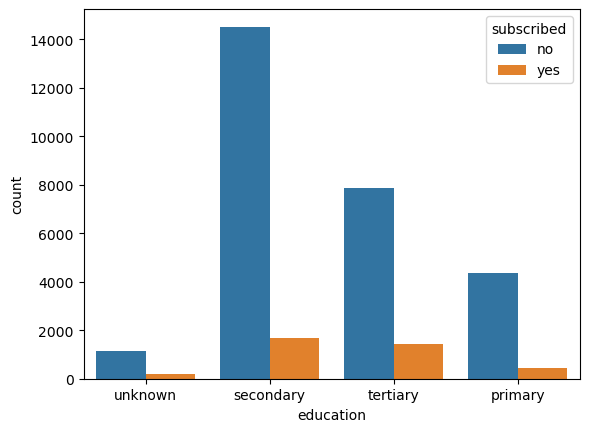

In [18]:
sns.countplot(data=df_train, x='education', hue = 'subscribed');


In [19]:
# Converting the target variables into 0s and 1s
df_train['subscribed'].replace('no', 0,inplace=True)
df_train['subscribed'].replace('yes', 1,inplace=True)

In [20]:
# encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
for i in df_train.columns:
    if df_train[i].dtypes=='object':
        df_train[i] = OE.fit_transform(df_train[i].values.reshape(-1,1))
df_train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0,0
1,40576,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0,0
2,15320,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0,0
3,43962,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0,1
4,29842,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,3.0,0
31643,40178,53,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,3.0,1
31644,19710,32,4.0,2.0,2.0,0.0,312,0.0,0.0,0.0,7,1.0,37,3,-1,0,3.0,0
31645,38556,57,9.0,1.0,1.0,0.0,225,1.0,0.0,1.0,15,8.0,22,7,337,12,0.0,0


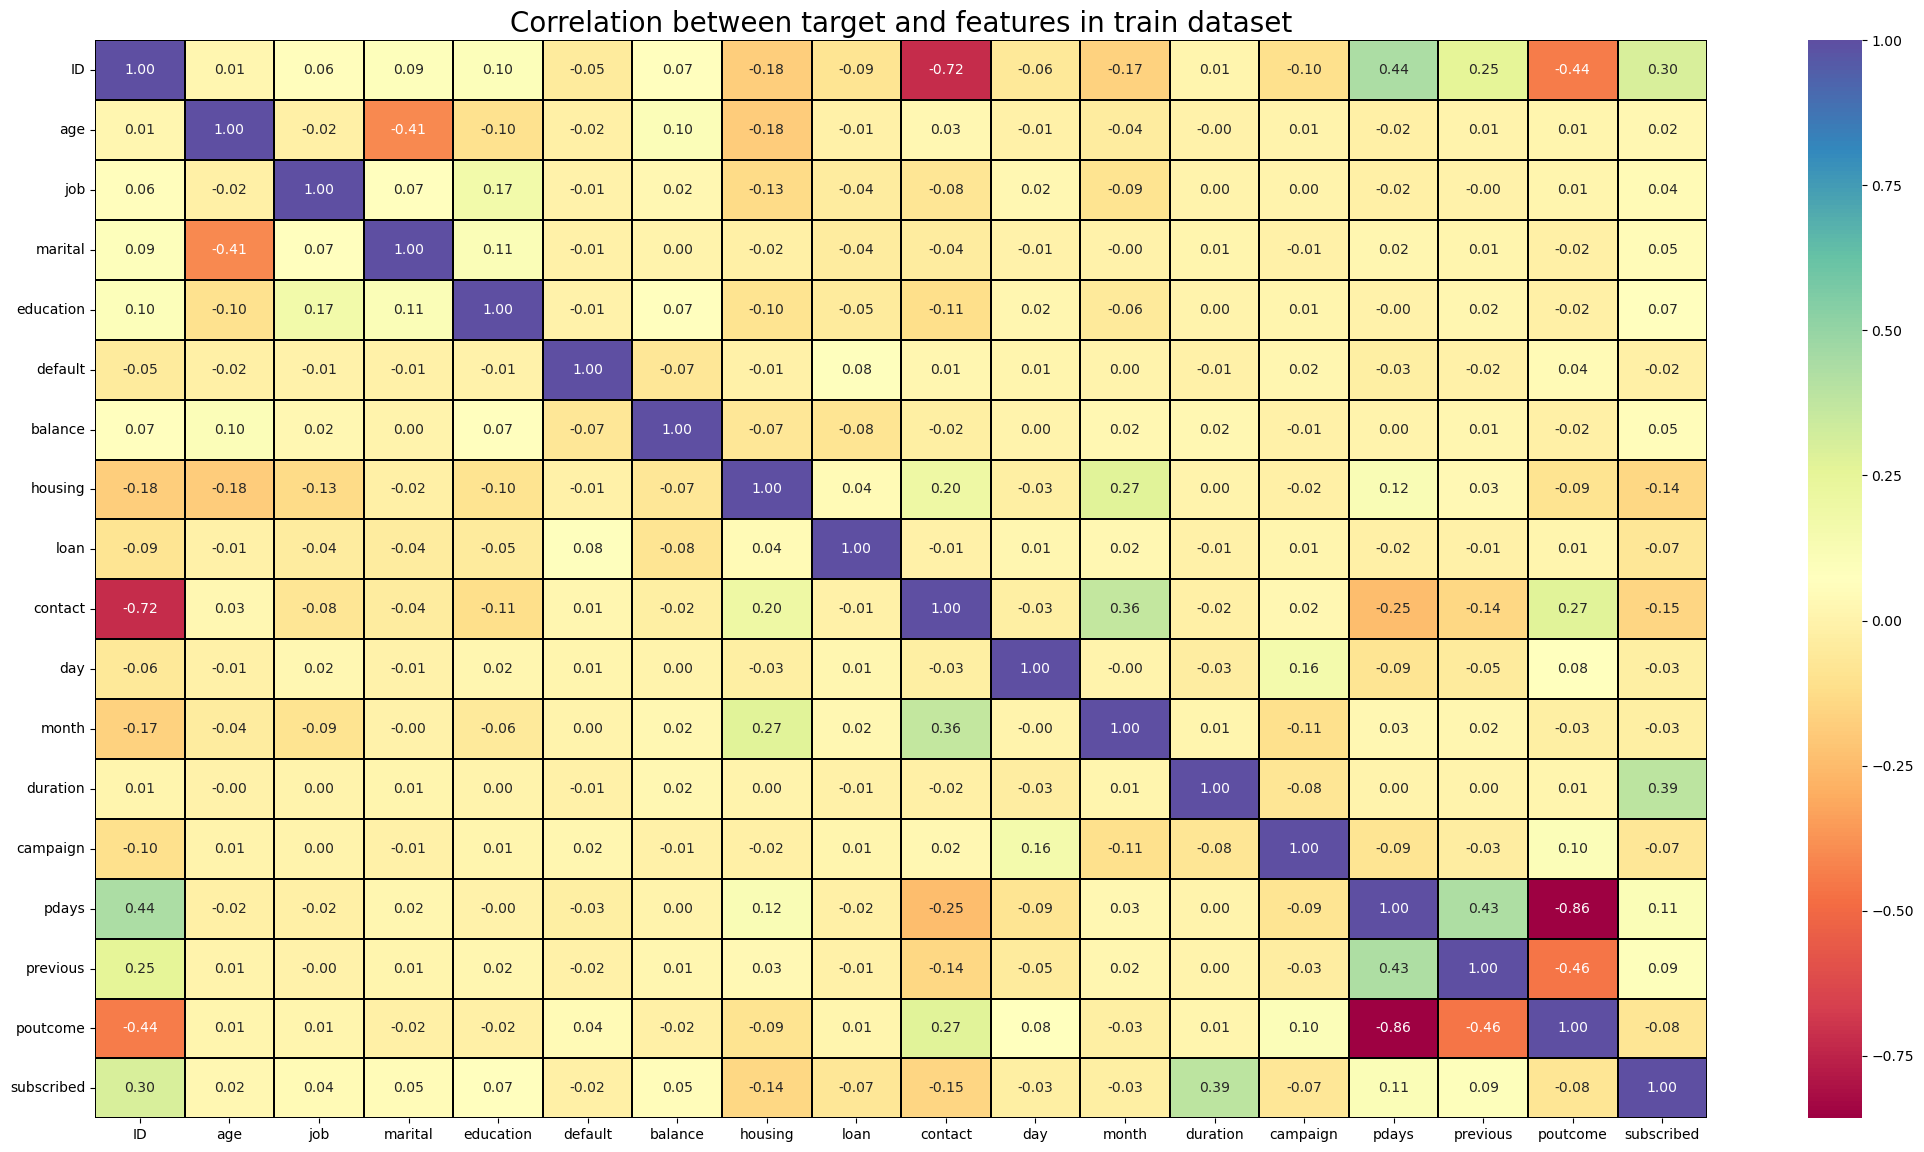

In [21]:
plt.figure(figsize = (26,14))
sns.heatmap(df_train.corr(), annot=True, fmt='0.2f', lw = 0.1, linecolor = 'black', cmap='Spectral')
plt.title ('Correlation between target and features in train dataset', fontsize = 20)
plt.show()

## Model building 

In [21]:
x = df_train.drop('subscribed', axis = 1)
y = df_train['subscribed']

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0 
maxRS = 0
for i in range(1,200): # we can take any rainge
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.30, random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print ('Best accuracy is', maxAccu, 'at random_State', maxRS)

Best accuracy is 0.9180621379673513 at random_State 77


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRS)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

In [26]:
LR = LogisticRegression()
KNN = KNeighborsClassifier(n_neighbors=2)
SVM = SVC(kernel='linear',C=1)
ADA = AdaBoostClassifier()
RFC = RandomForestClassifier(n_estimators= 10, max_depth=115, bootstrap= False)

In [27]:
for model in [LR, KNN, SVM, ADA, RFC]:
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    pred_train_df = accuracy_score(y_train, y_pred_train)
    pred_test_df = accuracy_score(y_test, y_pred_test)
    
    print(f"model: {model}\nTrain Accuracy: {pred_train_df}\nTest Accuracy: {pred_test_df}\n\n")

model: LogisticRegression()
Train Accuracy: 0.898383893102203
Test Accuracy: 0.9024749868351765


model: KNeighborsClassifier(n_neighbors=2)
Train Accuracy: 0.931924882629108
Test Accuracy: 0.8974196945760927


model: SVC(C=1, kernel='linear')
Train Accuracy: 0.8905742145178764
Test Accuracy: 0.8972090573986309


model: AdaBoostClassifier()
Train Accuracy: 0.9023564463705309
Test Accuracy: 0.9061611374407583


model: RandomForestClassifier(bootstrap=False, max_depth=115, n_estimators=10)
Train Accuracy: 1.0
Test Accuracy: 0.9109004739336493




In [28]:
Final = RandomForestClassifier(bootstrap = False, max_depth = 115, n_estimators = 10)
Final.fit(x_train, y_train)
pred = Final.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

91.16377040547657


In [29]:
OE= OrdinalEncoder()
for i in df_test.columns:
    if df_test[i].dtypes=='object':
        df_test[i] = OE.fit_transform(df_test[i].values.reshape(-1,1))

In [30]:
test_pred = Final.predict(df_test)
test_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
submissions = pd.DataFrame()
submissions['ID'] = df_test['ID']
submissions['subscribed'] = test_pred
submissions['subscribed']


0        0
1        1
2        0
3        0
4        1
        ..
13559    1
13560    0
13561    0
13562    0
13563    0
Name: subscribed, Length: 13564, dtype: int64